In [1]:
from astropy.io import fits
from ics.cobraCharmer import pfiDesign
import sep
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import moduleAnalyze
import pathlib

In [2]:
#xml = '/Users/cwen/MNT_AGC2/xml/spare2_new.xml'
#xml = '/Volumes/GoogleDrive/My Drive/CobraData/20190610/spare2_phiOptim_20190610.xml'
xml = pathlib.Path('/data/MCS/20191206_013/output/SC31_phi_search.xml')
brokens = []
camSplit = 28

In [ ]:
ana = moduleAnalyze.moduleAnalyze(xml, brokens, camSplit)

In [ ]:
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190625/20190625phiv1'
ana.convertXML('spare1_convert.xml', dataPath)

In [ ]:
#dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190610/'
#dataPath = '/Volumes/GoogleDrive/My Drive/COBRA/ASRD/190516/phi/003/'
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190625/20190625phiv1'
#ana.makePhiMotorMap('spare2_0015.xml', dataPath, steps=50, phiOnTime=0.015)
ana.makePhiMotorMap('spare1_wen.xml', dataPath, repeat=1, steps=250, fast=False, phiOnTime=0.03)

In [ ]:
#dataPath = '/Volumes/GoogleDrive/My Drive/COBRA/ASRD/190516/theta/003/'
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190618/20190618/0020/'
ana.makeThetaMotorMap('spare2_wen.xml', dataPath, steps=200, thetaOnTime=0.02)

In [ ]:
dataPath = '/home/pfs/Documents/cwen/ics_cobraCharmer/xml/'
phiPath = '/data/MCS/20191120_006/data/'
thetaPath = '/data/MCS/20191121_005/data/'
ana.calculateGeometry('SC02_02.xml', dataPath, thetaPath, phiPath)

In [ ]:
# SC31

sf = []
sr = []
tf = []
tr = []

for n in range(10):
    path = f'/data/MCS/20191206_{n+4:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + 'output/SC31_phi_search.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd2)
    tr.append(model.motorOntimeSlowRev2)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

In [ ]:
# SC30

sf = []
sr = []
tf = []
tr = []

for n in range(4):
    path = f'/data/MCS/20191216_{n*2+18:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + f'output/phi_run{n}.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd2)
    tr.append(model.motorOntimeSlowRev2)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

In [ ]:
# SC03

sf = []
sr = []
tf = []
tr = []

for n in range(4):
    path = f'/data/MCS/20191212_{n*2+7:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + f'output/phi_run{n}.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd2)
    tr.append(model.motorOntimeSlowRev2)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

In [3]:
# SC04

sf = []
sr = []
tf = []
tr = []

for n in range(10):
    path = f'/data/MCS/20191220_{n+13:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + f'output/SC04_phi_search3.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd2)
    tr.append(model.motorOntimeSlowRev2)

for n in range(11):
    path = f'/data/MCS/20191220_{n+25:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + f'output/SC04_phi_fast.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeFwd2)
    tr.append(model.motorOntimeRev2)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

/home/pfs/Documents/cwen/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:54: UserWarning: please use PFIDesign.loadModule() or PFIDesign.loadPFI()
  warnings.warn('please use PFIDesign.loadModule() or PFIDesign.loadPFI()')


In [ ]:
tf, tr

In [4]:
def speedFunc(x, a, b, n=2):
    return a * (np.power(np.power(x, n) + np.power(b, n), 1.0/n) - b)

def invSpeedFunc(x, a, b, n=2):
    return np.power(np.power(x/a + b, n) - np.power(b, n), 1.0/n)

In [5]:
spd = np.deg2rad(0.06)
ontimeF = np.empty(57)
ontimeR = np.empty(57)

for c in range(57):
    s = sf[1:-1,c]
    t = tf[1:-1,c]

    t0 = np.min(t)
    t1 = np.max(t)
    s0 = np.min(s)
    s1 = np.max(s)

    ontimeF[c] = t0 + (t1-t0)/(s1-s0)*(spd-s0)

for c in range(57):
    s = sr[1:-1,c]
    t = tr[1:-1,c]

    t0 = np.min(t)
    t1 = np.max(t)
    s0 = np.min(s)
    s1 = np.max(s)

    ontimeR[c] = t0 + (t1-t0)/(s1-s0)*(spd-s0)

print(ontimeF, ontimeR)

[0.01978495 0.02299496 0.02005934 0.02752013 0.02328412 0.02334768
 0.01555389 0.03200728 0.03046109 0.02429984 0.01451987 0.0143016
 0.01243453 0.01813651 0.02194211 0.02044979 0.02018994 0.02583888
 0.01997901 0.0153604  0.01765112 0.02723703 0.01712804 0.02358043
 0.01688717 0.01573119 0.01464333 0.01250159 0.02184034 0.01314949
 0.01663959 0.01498444 0.02175247 0.0192568  0.02371316 0.0226378
 0.01519349 0.01893967 0.01628719 0.02436107 0.01753026 0.01878459
 0.01479892 0.01636305 0.01466539 0.01462025 0.02542246 0.01892771
 0.02266621 0.02068331 0.02421604 0.01663983 0.01678467 0.01989098
 0.01453879 0.01764395 0.01943751] [0.01912876 0.02008327 0.01834213 0.02181735 0.02161686 0.02047864
 0.01611182 0.02733341 0.02017446 0.02409078 0.01604737 0.01267895
 0.01278179 0.01493076 0.02078759 0.01698863 0.02113152 0.02262411
 0.02056481 0.01854432 0.01683846 0.02011367 0.01695018 0.02114062
 0.01725793 0.01621313 0.01470087 0.01241134 0.02059231 0.01257574
 0.01752436 0.01550821 0.0231

In [6]:
spd = np.deg2rad(0.06)
ontimeF = np.empty(57)
ontimeR = np.empty(57)

for c in range(57):
    s = sf[:,c]
    t = tf[:,c]
    params, params_cov = optimize.curve_fit(speedFunc, t, s, p0=[1,0.05])
    ontimeF[c] = invSpeedFunc(spd, params[0], params[1])

for c in range(57):
    s = sr[:,c]
    t = tr[:,c]
    params, params_cov = optimize.curve_fit(speedFunc, t, s, p0=[1,0.05])
    ontimeR[c] = invSpeedFunc(spd, params[0], params[1])

print(ontimeF, ontimeR)

[0.01858377 0.02448217 0.02038009 0.02571538 0.02354367 0.02331489
 0.01524341 0.03150119 0.02854726 0.0247821  0.01515452 0.01385622
 0.01114898 0.01652215 0.02071849 0.01868578 0.0205442  0.02490706
 0.0212678  0.0155035  0.01773276 0.02506793 0.01605111 0.02384436
 0.01682193 0.01474197 0.0135335  0.0125423  0.01971209 0.01299785
 0.01500878 0.01433308 0.02191044 0.01944994 0.02451083 0.02094482
 0.01564261 0.01861141 0.01575085 0.02287059 0.01650505 0.01895673
 0.01436116 0.01533444 0.01364894 0.01425763 0.026447   0.01844192
 0.02343437 0.0193985  0.02387676 0.01650663 0.01569918 0.02116163
 0.01460794 0.01819329 0.01871958] [0.01812438 0.02097638 0.018047   0.02195493 0.02070367 0.01979881
 0.01473021 0.02677514 0.0181373  0.02416036 0.01527161 0.01238482
 0.01155227 0.01449506 0.02153795 0.01606276 0.02085351 0.02262077
 0.02056257 0.01870203 0.01712423 0.01990357 0.01746136 0.02176306
 0.01645249 0.01445631 0.01450867 0.01174275 0.01869018 0.01155783
 0.01664483 0.01520794 0.02

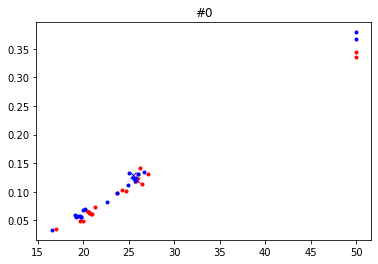

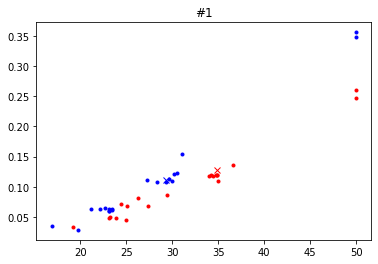

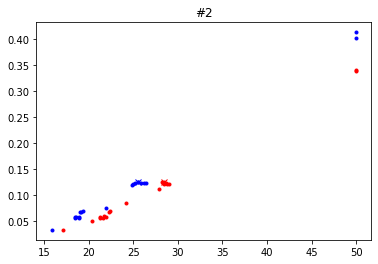

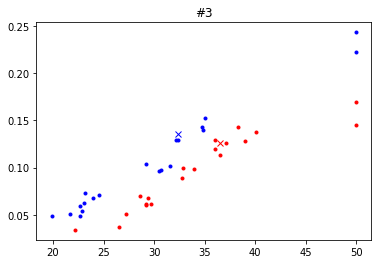

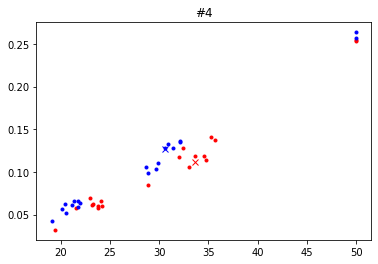

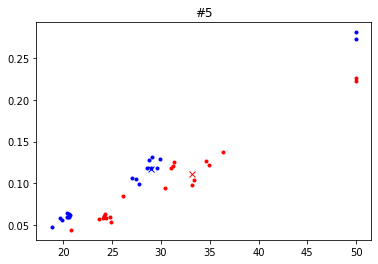

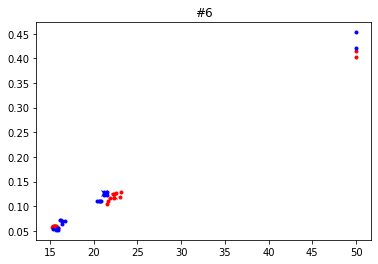

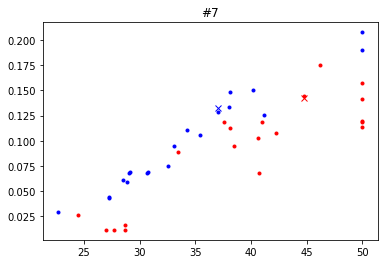

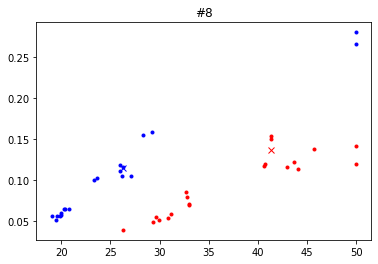

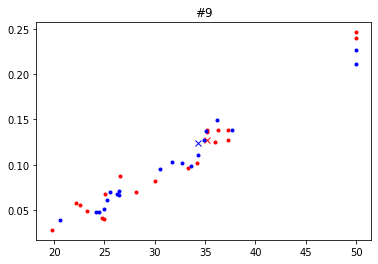

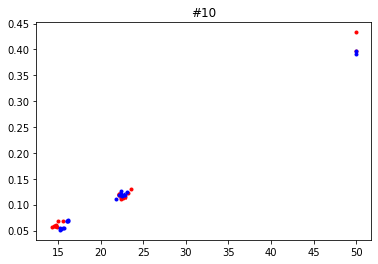

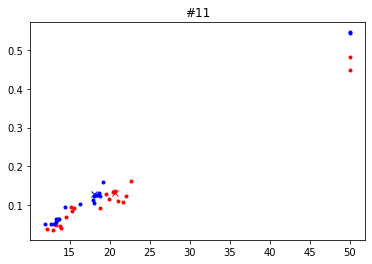

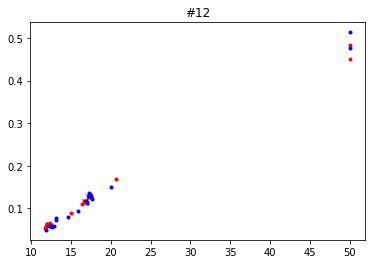

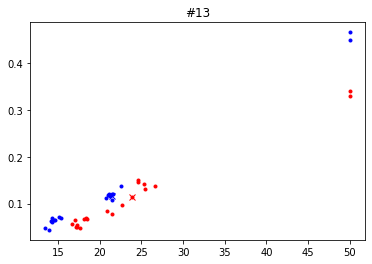

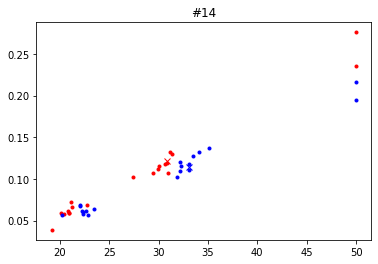

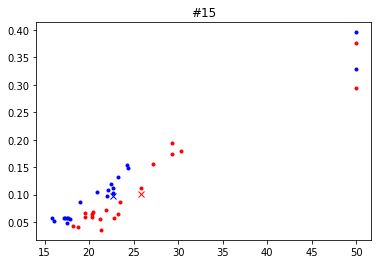

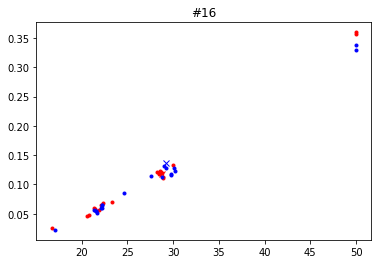

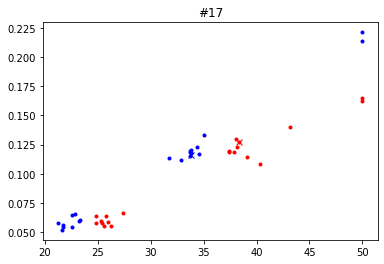

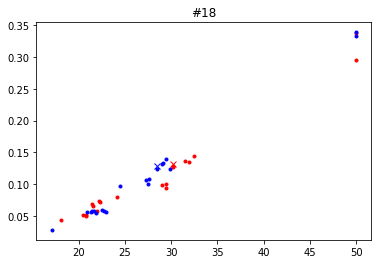

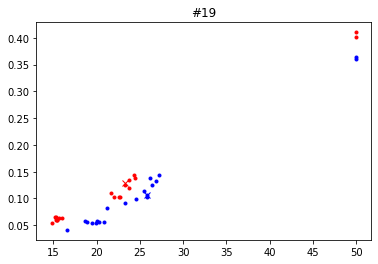

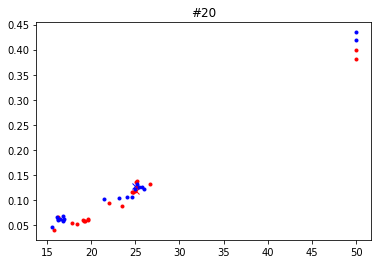

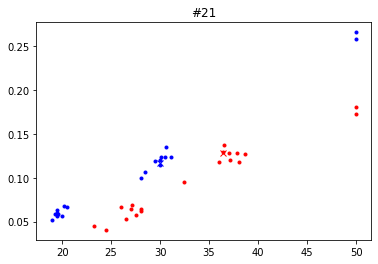

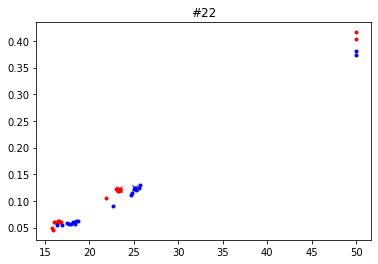

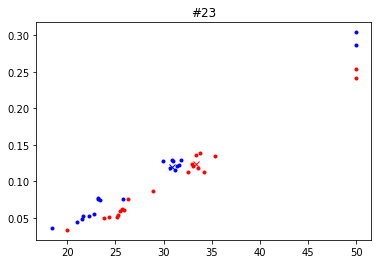

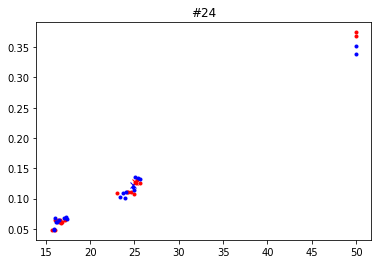

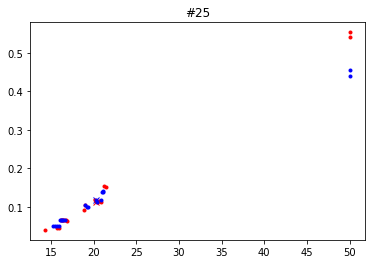

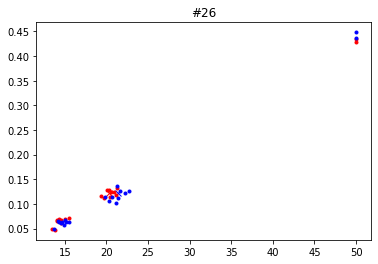

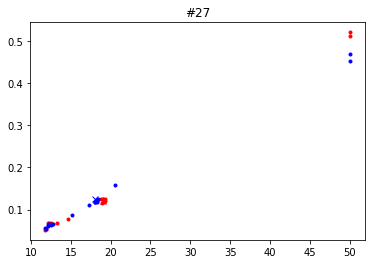

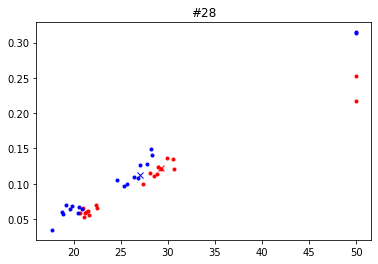

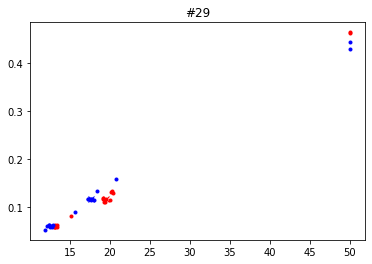

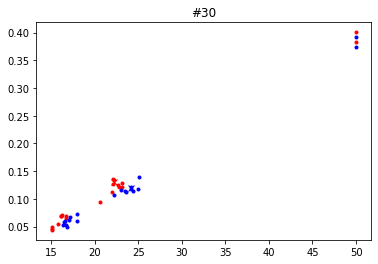

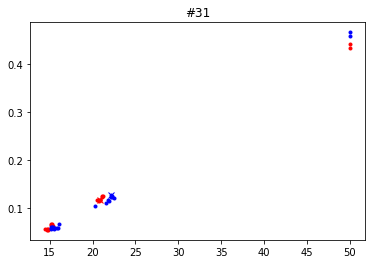

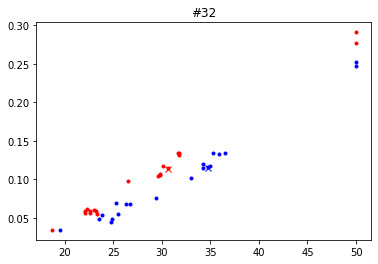

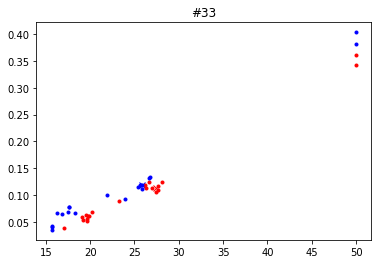

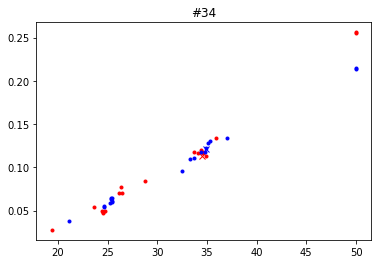

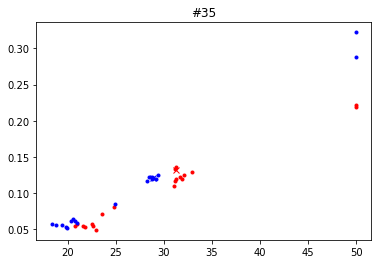

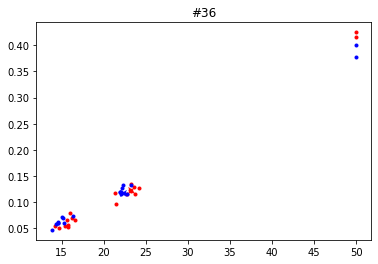

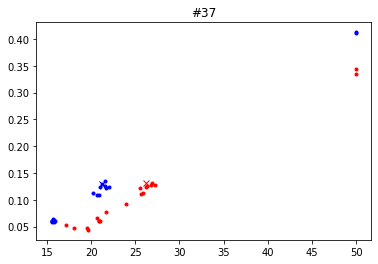

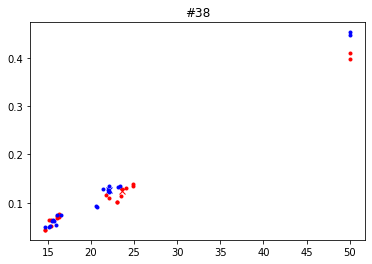

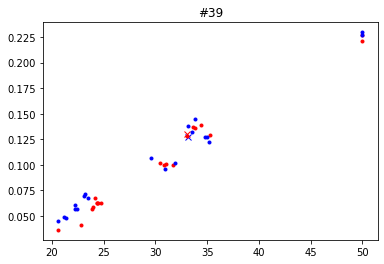

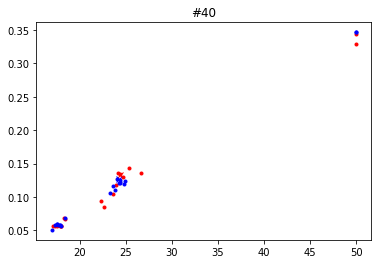

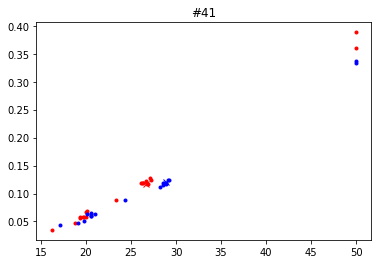

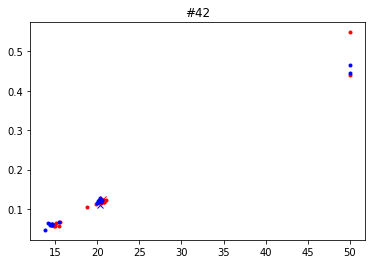

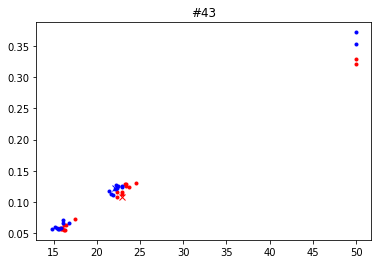

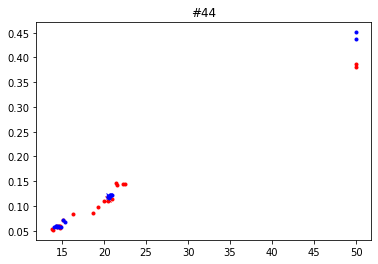

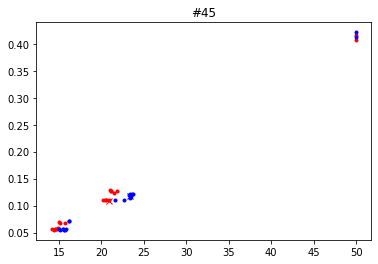

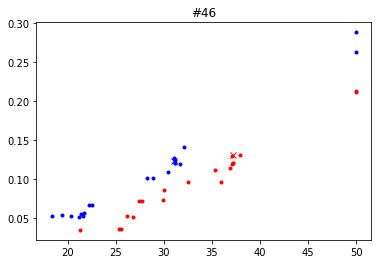

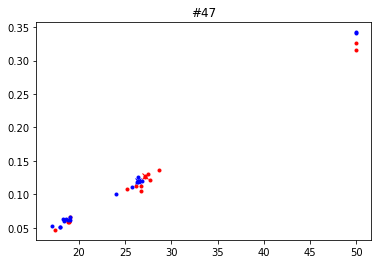

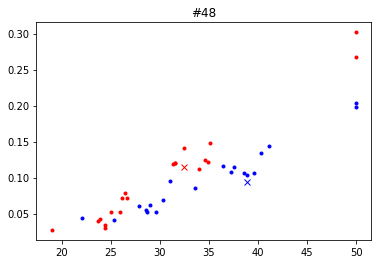

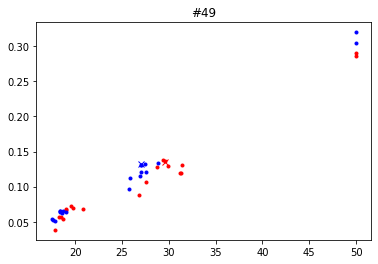

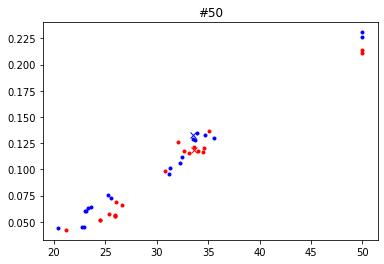

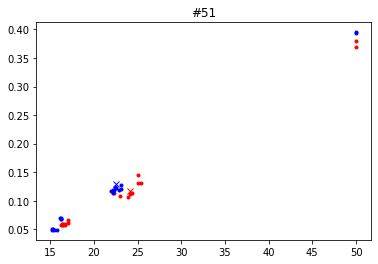

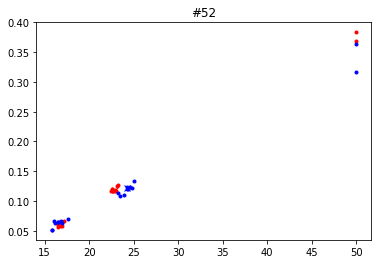

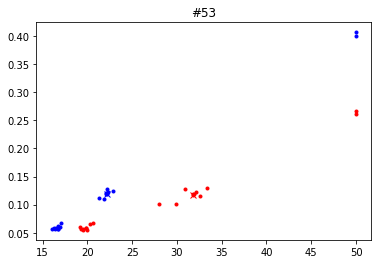

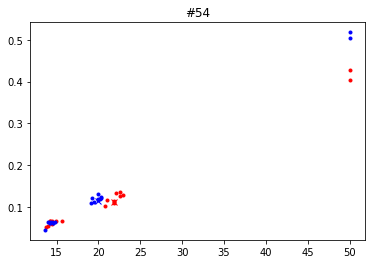

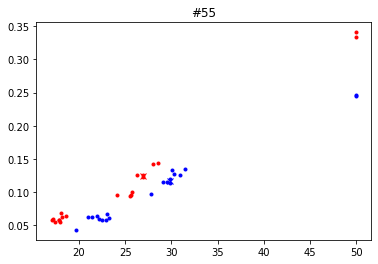

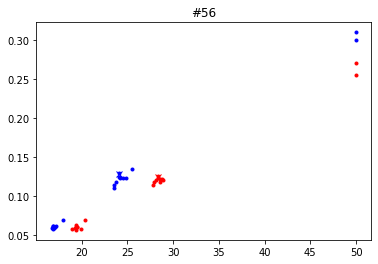

In [7]:
for c in range(57):
    ax = plt.gca()
    ax.set_title(f'#{c}')
    plt.plot(tf[-1,c]*1000, np.rad2deg(sf[-1,c]), 'rx')
    plt.plot(tr[-1,c]*1000, np.rad2deg(sr[-1,c]), 'bx')
    plt.plot(tf[:-1,c]*1000, np.rad2deg(sf[:-1,c]), 'r.')
    plt.plot(tr[:-1,c]*1000, np.rad2deg(sr[:-1,c]), 'b.')
#    plt.plot(ontimeF[c]*1000, np.rad2deg(spd), 'ro')
#    plt.plot(ontimeR[c]*1000, np.rad2deg(spd), 'bo')
    plt.show()

In [8]:
base = 0

x = tf.flatten()
y = (sf/sf[base]).flatten()
params, params_cov = optimize.curve_fit(speedFunc, x, y, p0=[30,0.05])
print(params, params_cov)
keep = np.abs(speedFunc(x, params[0], params[1]) - y) < 0.3
print(np.where(keep==False))
params, params_cov = optimize.curve_fit(speedFunc, x[keep], y[keep], p0=[30,0.05])
print(params, params_cov)

x = tr.flatten()
y = (sr/sr[base]).flatten()
params2, params_cov2 = optimize.curve_fit(speedFunc, x, y, p0=[30,0.05])
print(params2, params_cov2)
keep = np.abs(speedFunc(x, params2[0], params2[1]) - y) < 0.3
print(np.where(keep==False))
params2, params_cov2 = optimize.curve_fit(speedFunc, x[keep], y[keep], p0=[30,0.05])
print(params2, params_cov2)

x = np.concatenate((tf.flatten(), tr.flatten()))
y = np.concatenate(((sf/sf[base]).flatten(), (sr/sr[base]).flatten()))
params3, params_cov3 = optimize.curve_fit(speedFunc, x, y, p0=[30,0.05])
print(params3, params_cov3)
keep = np.abs(speedFunc(x, params3[0], params3[1]) - y) < 0.3
print(np.where(keep==False))
params3, params_cov3 = optimize.curve_fit(speedFunc, x[keep], y[keep], p0=[30,0.05])
print(params3, params_cov3)

[3.72091185e+01 3.16361986e-02] [[9.26675674e-01 1.20888828e-03]
 [1.20888828e-03 1.62563124e-06]]
(array([ 235,  630,  976,  977, 1033, 1091, 1148]),)
[3.64415664e+01 3.08651821e-02] [[7.12154847e-01 9.35597693e-04]
 [9.35597693e-04 1.26920604e-06]]
[3.42403083e+01 2.83249148e-02] [[3.35057935e-01 4.44004699e-04]
 [4.44004699e-04 6.13334454e-07]]
(array([], dtype=int64),)
[3.42403083e+01 2.83249148e-02] [[3.35057935e-01 4.44004699e-04]
 [4.44004699e-04 6.13334454e-07]]
[3.57346335e+01 2.99888424e-02] [[2.96955580e-01 3.90540199e-04]
 [3.90540199e-04 5.32148598e-07]]
(array([ 235,  630,  976,  977, 1033, 1091, 1148]),)
[3.53441939e+01 2.95952020e-02] [[2.52238848e-01 3.32918265e-04]
 [3.32918265e-04 4.55722257e-07]]


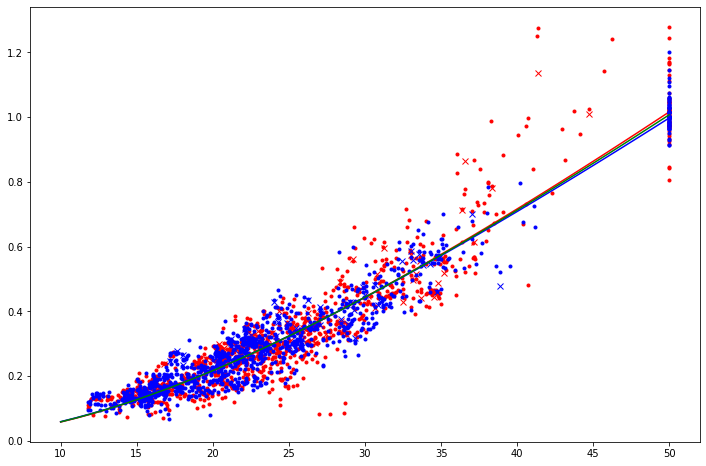

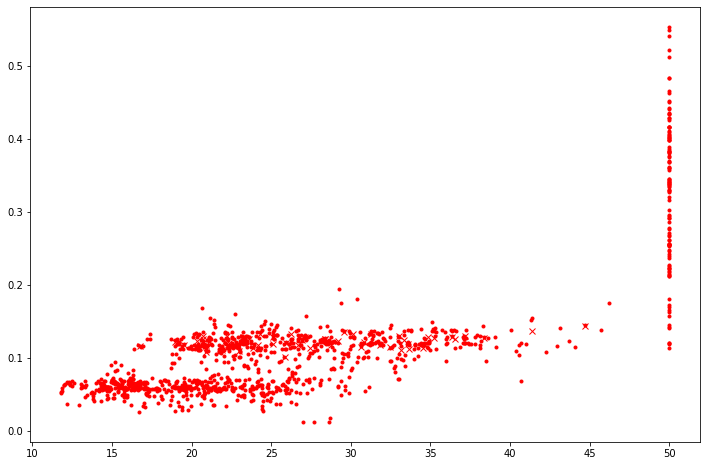

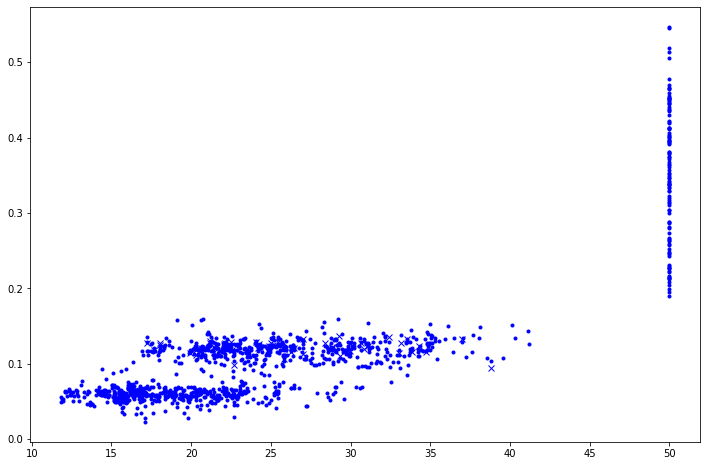

In [9]:
plt.figure(figsize=(12,8))
plt.plot(tf[-1]*1000, sf[-1]/sf[base], 'rx')
plt.plot(tf[:-1]*1000, sf[:-1]/sf[base], 'r.')
#plt.plot(ontimeF[c]*1000, np.rad2deg(spd), 'ro')
#plt.plot(ontimeR[c]*1000, np.rad2deg(spd), 'bo')
ax = np.arange(10, 51)
plt.plot(ax, speedFunc(ax/1000, params[0], params[1]), 'r')
#plt.show()

#plt.figure(figsize=(12,8))
plt.plot(tr[-1]*1000, sr[-1]/sr[base], 'bx')
plt.plot(tr[:-1]*1000, sr[:-1]/sr[base], 'b.')
#plt.plot(ontimeF[c]*1000, np.rad2deg(spd), 'ro')
#plt.plot(ontimeR[c]*1000, np.rad2deg(spd), 'bo')
plt.plot(ax, speedFunc(ax/1000, params2[0], params2[1]), 'b')
plt.plot(ax, speedFunc(ax/1000, params3[0], params3[1]), 'g')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(tf[-1]*1000, np.rad2deg(sf[-1]), 'rx')
plt.plot(tf[:-1]*1000, np.rad2deg(sf[:-1]), 'r.')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(tr[-1]*1000, np.rad2deg(sr[-1]), 'bx')
plt.plot(tr[:-1]*1000, np.rad2deg(sr[:-1]), 'b.')
plt.show()